In [1]:
import pandas as pd

df = pd.read_csv("sunspots.csv")
df.head()

C:\Users\ishit\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,Unnamed: 0,Date,Monthly Mean Total Sunspot Number
0,0,1749-01-31,96.7
1,1,1749-02-28,104.3
2,2,1749-03-31,116.7
3,3,1749-04-30,92.8
4,4,1749-05-31,141.7


In [2]:
df.columns

Index(['Unnamed: 0', 'Date', 'Monthly Mean Total Sunspot Number'], dtype='object')

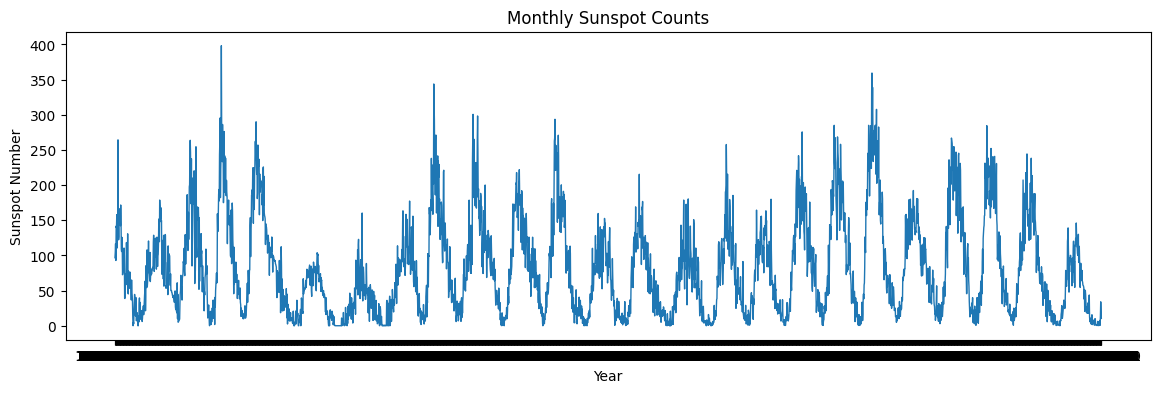

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,4))
plt.plot(df['Date'], df['Monthly Mean Total Sunspot Number'], linewidth=1)
plt.title("Monthly Sunspot Counts")
plt.xlabel("Year")
plt.ylabel("Sunspot Number")
plt.show()

In [4]:
# Create a cycle number (each cycle = 12 years = 144 months)
df['Cycle'] = (df.index // 144) + 1
df.head()

,Unnamed: 0,Date,Monthly Mean Total Sunspot Number,Cycle
0,0,1749-01-31,96.7,1
1,1,1749-02-28,104.3,1
2,2,1749-03-31,116.7,1
3,3,1749-04-30,92.8,1
4,4,1749-05-31,141.7,1


In [5]:
df['Sunspot_Pos'] = df['Monthly Mean Total Sunspot Number'].clip(lower=0.0001)

In [6]:
from scipy.stats import gamma
import numpy as np

cycle_params = {}

for cycle in df['Cycle'].unique():
    data = df[df['Cycle'] == cycle]['Sunspot_Pos']
    a, loc, b = gamma.fit(data, floc=0)  # now allowed
    cycle_params[cycle] = (a, b)

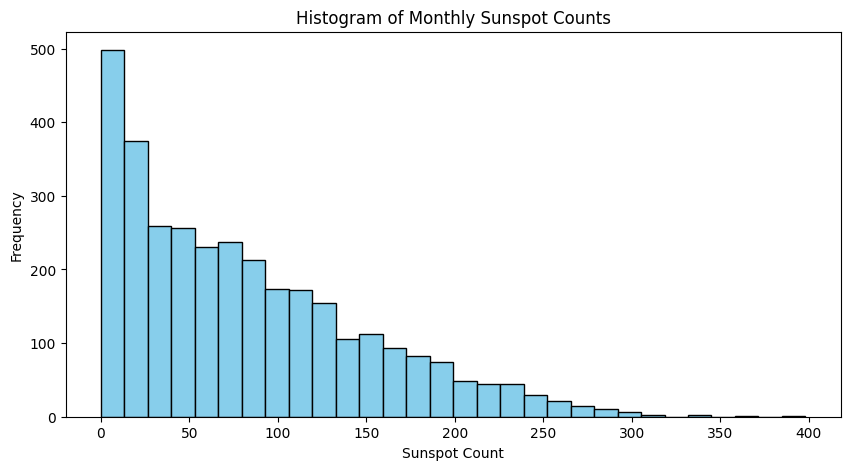

In [7]:
plt.figure(figsize=(10,5))
plt.hist(df['Sunspot_Pos'], bins=30, color='skyblue', edgecolor='black')
plt.title("Histogram of Monthly Sunspot Counts")
plt.xlabel("Sunspot Count")
plt.ylabel("Frequency")
plt.show()

C:\Users\ishit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


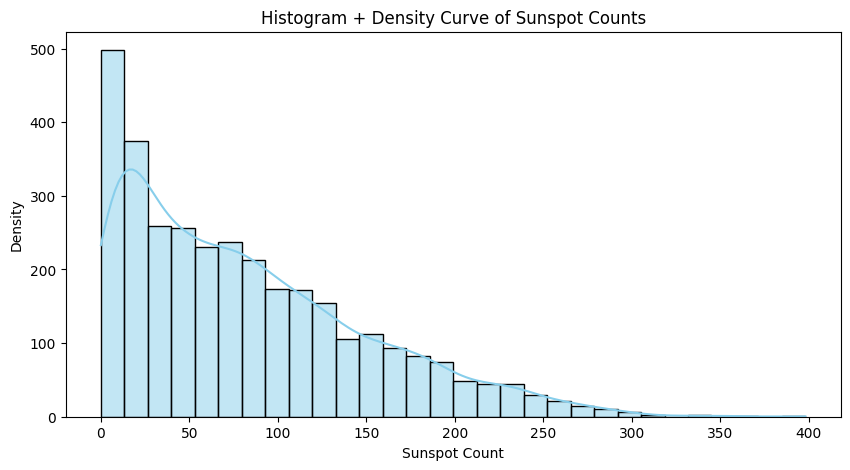

In [8]:
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(df['Sunspot_Pos'], bins=30, kde=True, color='skyblue')
plt.title("Histogram + Density Curve of Sunspot Counts")
plt.xlabel("Sunspot Count")
plt.ylabel("Density")
plt.show()

In [9]:
from scipy.stats import gamma

In [10]:
a = 4
b = 10

In [11]:
# prepare groups
first_50 = df['Sunspot_Pos'].head(50)
all_data = df['Sunspot_Pos']
last_50 = df['Sunspot_Pos'].tail(50)

# compute MNMC
mnmc_first = gamma.pdf(first_50, a, scale=b)
mnmc_all = gamma.pdf(all_data, a, scale=b)
mnmc_last = gamma.pdf(last_50, a, scale=b)

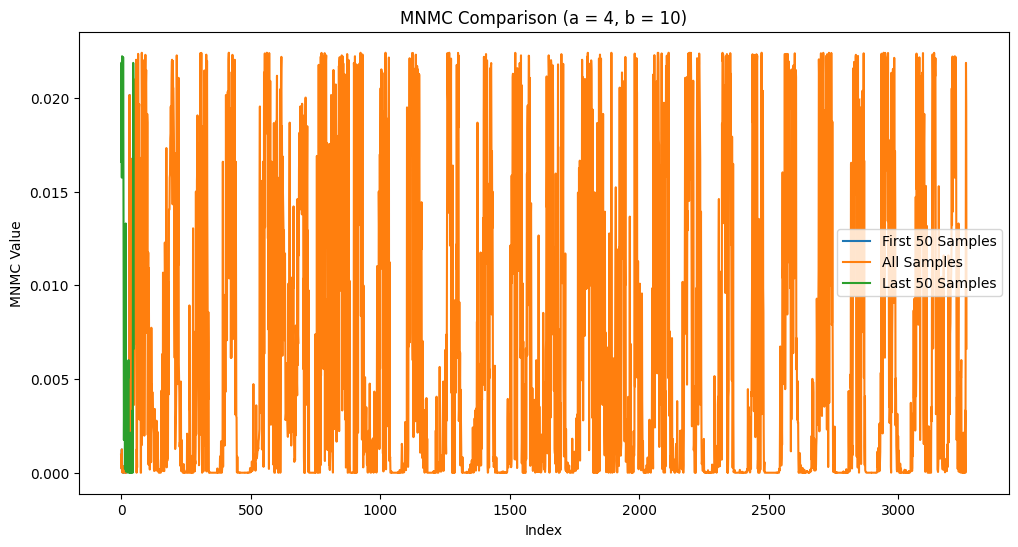

In [12]:
plt.figure(figsize=(12,6))
plt.plot(mnmc_first, label="First 50 Samples")
plt.plot(mnmc_all, label="All Samples")
plt.plot(mnmc_last, label="Last 50 Samples")

plt.title("MNMC Comparison (a = 4, b = 10)")
plt.xlabel("Index")
plt.ylabel("MNMC Value")
plt.legend()
plt.show()

In [13]:
import os
os.listdir()

['.ipynb_checkpoints',
 'Assignment 1 .ipynb',
 'inventory.py',
 'iris.csv',
 'practical1.ipynb',
 'Practical2.ipynb',
 'Practical3.ipynb',
 'Practical4.ipynb',
 'Practical5.ipynb',
 'Practical6.ipynb',
 'Practical7.ipynb',
 'Practical9.ipynb',
 'practical_10.ipynb',
 'Practical_11.ipynb',
 'student_rating.xlsx',
 'Sunspots.csv',
 'teacher_ratings.csv',
 'Untitled.ipynb',
 '__pycache__']

In [14]:
%%writefile inventory.py
inventory = [
    {"id": 1, "name": "Laptop", "quantity": 10, "price": 75000},
    {"id": 2, "name": "Mouse", "quantity": 50, "price": 500},
    {"id": 3, "name": "Keyboard", "quantity": 30, "price": 1200},
]

Overwriting inventory.py


In [15]:
from inventory import inventory

In [16]:
os.listdir()

['.ipynb_checkpoints',
 'Assignment 1 .ipynb',
 'inventory.py',
 'iris.csv',
 'practical1.ipynb',
 'Practical2.ipynb',
 'Practical3.ipynb',
 'Practical4.ipynb',
 'Practical5.ipynb',
 'Practical6.ipynb',
 'Practical7.ipynb',
 'Practical9.ipynb',
 'practical_10.ipynb',
 'Practical_11.ipynb',
 'student_rating.xlsx',
 'Sunspots.csv',
 'teacher_ratings.csv',
 'Untitled.ipynb',
 '__pycache__']

In [17]:
from flask import Flask, jsonify
from inventory import inventory
from threading import Thread

app = Flask(__name__)

@app.route('/inventory', methods=['GET'])
def get_inventory():
    return jsonify(inventory)

@app.route('/inventory/<int:productid>', methods=['GET'])
def get_product(productid):
    product = next((item for item in inventory if item["id"] == productid), None)
    if product:
        return jsonify(product)
    return jsonify({"error": "Product not found"}), 404

def run_app():
    app.run(port=5000)

Thread(target=run_app).start()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
